<a href="https://colab.research.google.com/github/danig04/analisis/blob/main/laboratorio_4_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""

Laboratorio #4 - Clustering

Integrantes:

- Luis Fernández Serrano
- Rafael Zúñiga Vindas
- Daniel Gómez Mena
- Emanuel Pérez Sánchez

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

estudiantes = pd.read_csv('/content/EjemploEstudiantes.csv', sep = ';', decimal = ',', index_col = 0)
estudiantes

,Matematicas,Ciencias,Espanol,Historia,EdFisica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


**Análisis de Componentes Principales (ACP)**

Consiste en construir un pequeño número de nuevas variables en las cuales se concentre la mayor cantidad posible de información.

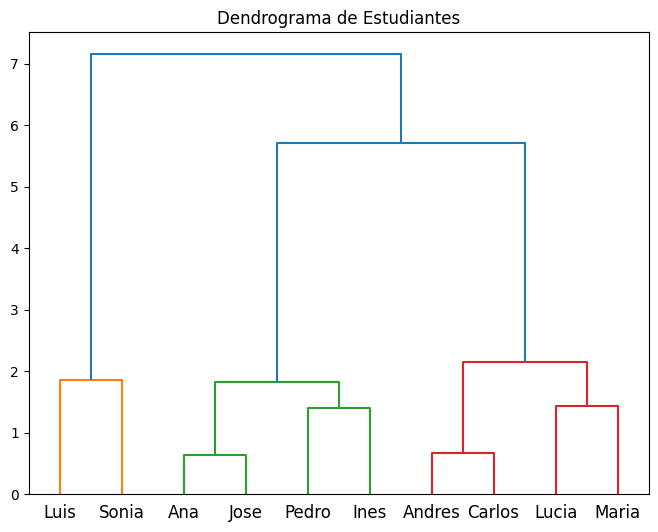

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
estudiantes_scaled = scaler.fit_transform(estudiantes)

# Realizar el ACP
pca = PCA(n_components = 2) # Se está reduciendo a 2 componentes principales
estudiantes_pca = pca.fit_transform(estudiantes_scaled)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data = estudiantes_pca, columns = ['Componente 1', 'Componente 2'], index = estudiantes.index)

# Realizar el análisis de conglomerados (clustering)
Z = linkage(estudiantes_scaled, method = 'ward')  # Construir el dendrograma

# Visualizar el dendrograma
plt.figure(figsize = (8, 6))
dendrogram(Z, labels = estudiantes.index)
plt.title('Dendrograma de Estudiantes')
plt.show()

# Definir el número de clusters (en este caso se van a localizar 3 dentro del plano)
num_clusters = 3

# Realizar el corte del dendrograma para obtener los clusters
clusters = fcluster(Z, t = num_clusters, criterion = 'maxclust')

# Agregar la información de clusters al DataFrame original
estudiantes['Cluster'] = clusters

In [ ]:
# Imprimir a los estudiantes junto a su cluster correspondiente
estudiantes[['Cluster']]

,Cluster
Lucia,3
Pedro,2
Ines,2
Luis,1
Andres,3
Ana,2
Carlos,3
Jose,2
Sonia,1
Maria,3


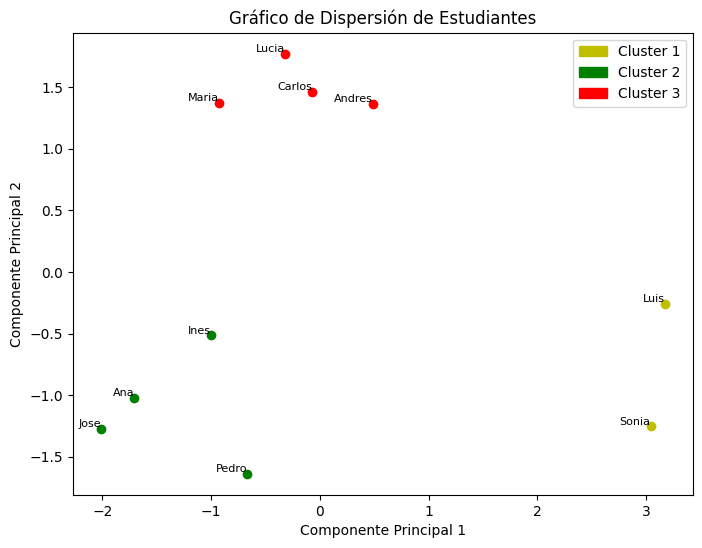

In [ ]:
# Colores para los clústeres
colors = ['y', 'g', 'r']

# Crear un gráfico de dispersión
plt.figure(figsize = (8, 6))

# Crear una lista de etiquetas personalizadas para la leyenda para que los colores que se indican en la leyenda coincidan
legend_labels = [mpatches.Patch(color=colors[i], label=f'Cluster {i+1}') for i in range(3)]

# Iterar a través de los estudiantes y agregarlos al gráfico de dispersión
for estudiante in estudiantes.index:
    x = pca_df.loc[estudiante]['Componente 1']
    y = pca_df.loc[estudiante]['Componente 2']
    cluster = int(estudiantes.loc[estudiante]['Cluster'])  # Convertir a entero

    plt.scatter(x, y, label=estudiante, c=colors[cluster - 1])

# Configuración del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersión de Estudiantes')

# Agregar etiquetas a los puntos
for estudiante in estudiantes.index:
    x = pca_df.loc[estudiante]['Componente 1']
    y = pca_df.loc[estudiante]['Componente 2']
    plt.text(x, y, estudiante, fontsize=8, ha='right', va='bottom')

# Crear una leyenda personalizada
plt.legend(handles=legend_labels, loc='upper right')

# Mostrar el gráfico
plt.show()

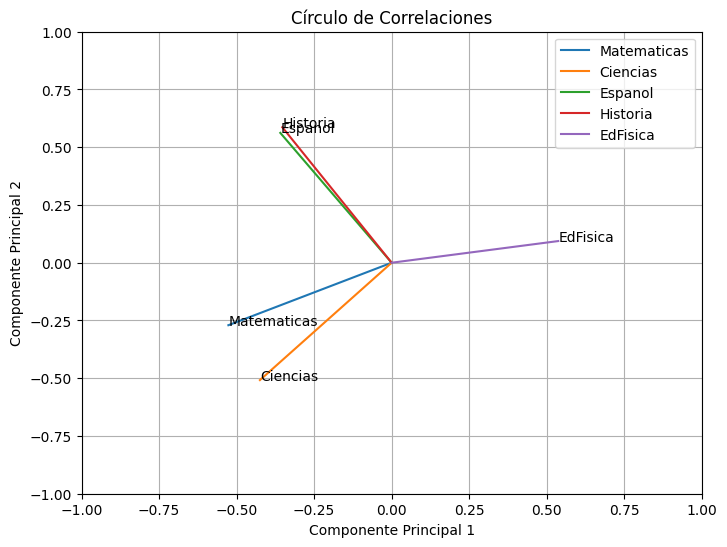

In [ ]:
# Removiendo la columna "Cluster" que indicaba en cuál cluster se encontraba alojado cada estudiante
estudiantes_original = estudiantes.drop(columns=['Cluster'])

# Visualizar el círculo de correlaciones
plt.figure(figsize = (8, 6))
circle_of_correlations = pca.components_.T
for i, (x, y) in enumerate(zip(circle_of_correlations[:, 0], circle_of_correlations[:, 1])):
    plt.plot([0, x], [0, y], label = estudiantes_original.columns[i])
    plt.text(x, y, estudiantes_original.columns[i])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Círculo de Correlaciones')
plt.legend()
plt.grid()
plt.show()

**Interpretación de los ángulos entre las variables dentro del círculo de correlación**

*   Si dos rectas están cercanas entre sí, su correlación es fuertemente positiva
*   Si el ángulo entre rectas es cercano a los 90° entonces no existe ninguna correlación.
*   Si dos rectas están opuestas al origen entonces existe una correlación fuertemente negativa.

In [ ]:
# Conclusiones

"""

El clúster 1 (Luis y Sonia), se ve fuertemente impactado de manera positiva por las notas de educación física, es decir, son buenos deportistas.
Recordando las correlaciones entre variables, podemos afirmar que son malos en ciencias y matemáticas, pues son variables inversamente correlacionadas
con respecto a educación física. También se puede apreciar que son malos en español e historia, pues se oponen negativamente a estas variables en el plano.

El clúster 2 (Ana, Inés, José y Pedro) parece ser el opuesto del clúster 1. Sus integrantes se destacan en las ciencias y las matemáticas,
sin embargo son malos en deportes. Con respecto a las materias de español e historia, por estar de forma perpendicular o correlación nula,
no es correcto asumir nada sobre su comportamiento.

El clúster 3 (Andrés, Carlos, Lucía y María) se caracteriza por agrupar a los estudiantes destacados en el área de español e historia.
Se puede inferir también que si bien no son excelentes en deportes, al menos no son los peores, pues se encuentran en la mitad del eje X.

"""

print()

In [ ]:
# Superposición de los gráficos

%%html
<img src="https://drive.google.com/uc?export=view&id=11Y2TbIDWnXZZfpqRSs6BnNfhsAGz7T4c" width="800" height="800"></img>